In [1]:
import pandas as pd

### Data

In [2]:
# Read
csse_ts = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
# Nvm these
csse_ts = csse_ts.drop(['Province/State','Lat','Long'], axis=1)

In [4]:
# Pivot and sort
csse_ts = csse_ts.pivot_table(index='Country/Region').rename_axis(None).sort_index().T

In [5]:
csse_ts

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000000,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000000,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000000,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500,0.0,...,0.000000,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/5/20,3224.0,820.0,4838.0,751.0,36.0,25.0,5020.0,2619.0,859.375,15650.0,...,17840.272727,670.0,2207.0,361.0,271.0,371.0,6.0,22.0,138.0,34.0
5/6/20,3392.0,832.0,4997.0,751.0,36.0,25.0,5208.0,2782.0,861.750,15684.0,...,18396.272727,673.0,2233.0,379.0,271.0,374.0,6.0,25.0,146.0,34.0
5/7/20,3563.0,842.0,5182.0,752.0,36.0,25.0,5371.0,2884.0,864.125,15752.0,...,18907.000000,684.0,2298.0,381.0,288.0,375.0,6.0,25.0,153.0,34.0
5/8/20,3778.0,850.0,5369.0,752.0,43.0,25.0,5611.0,3029.0,864.750,15774.0,...,19329.909091,694.0,2325.0,388.0,288.0,375.0,6.0,34.0,167.0,34.0


In [6]:
# Name rows
csse_ts.index.name = 'Date_Confirmed'

In [7]:
# set index
csse_ts.reset_index(inplace=True)

In [8]:
# Set date and sort
csse_ts = csse_ts.set_index(pd.DatetimeIndex(csse_ts['Date_Confirmed'])).sort_index()

In [9]:
# Resample for daily mean (if needed)
csse_ts = csse_ts.resample('1D').mean().round()

In [10]:
# Calculate delta (increase) of daily cases
csse_daily = csse_ts.diff().fillna(0).reset_index()

In [11]:
csse_daily[['Date_Confirmed', 'Mexico']]

,Date_Confirmed,Mexico
0,2020-01-22,0.0
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
...,...,...
116,2020-05-17,2075.0
117,2020-05-18,2414.0
118,2020-05-19,2713.0
119,2020-05-20,2248.0


### Export

In [12]:
csse_ts.to_csv('output_data/total-world-covid19.csv', index=True) # Total
csse_daily.to_csv('output_data/daily-world_covid19.csv', index=False) # Daily

### Plots

In [13]:
from numpy import *
import math
import matplotlib.pyplot as plt

#### Cumulative
Note exponential growth is expected and not really informative.

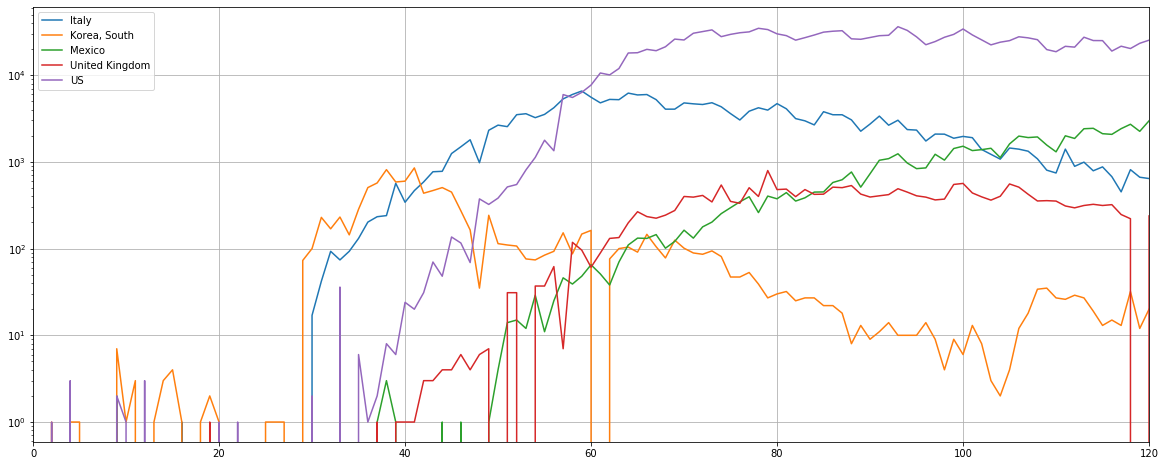

In [14]:
plt.figure(figsize=(20,8))

for state in ['Italy','Korea, South','Mexico','United Kingdom','US']:
    csse_daily[state].fillna(0).plot()

plt.yscale('log')

plt.legend()
plt.grid(True)
plt.show()

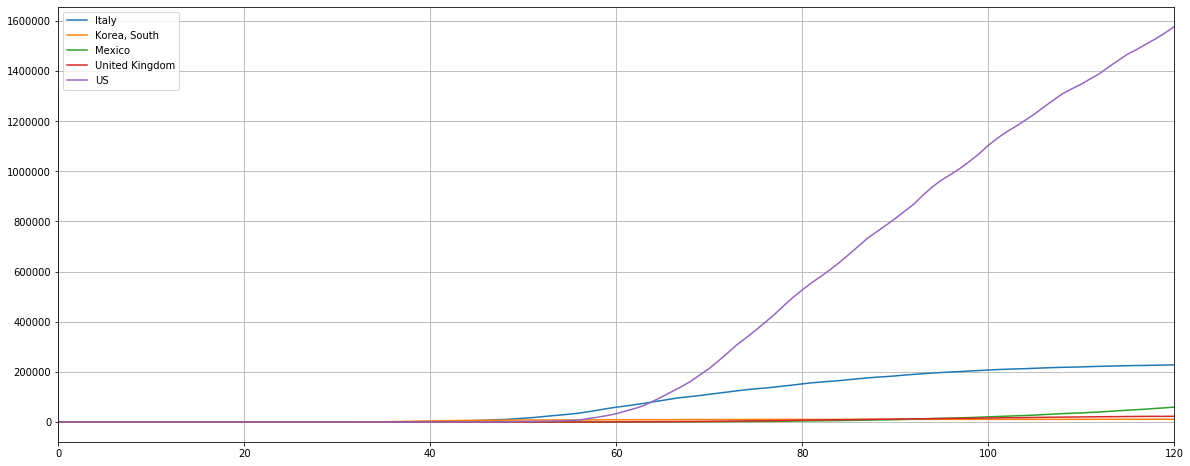

In [15]:
plt.figure(figsize=(20,8))

for state in ['Italy','Korea, South','Mexico','United Kingdom','US']:
    csse_daily[state].fillna(0).cumsum().plot()

plt.legend()
plt.grid(True)
plt.show()

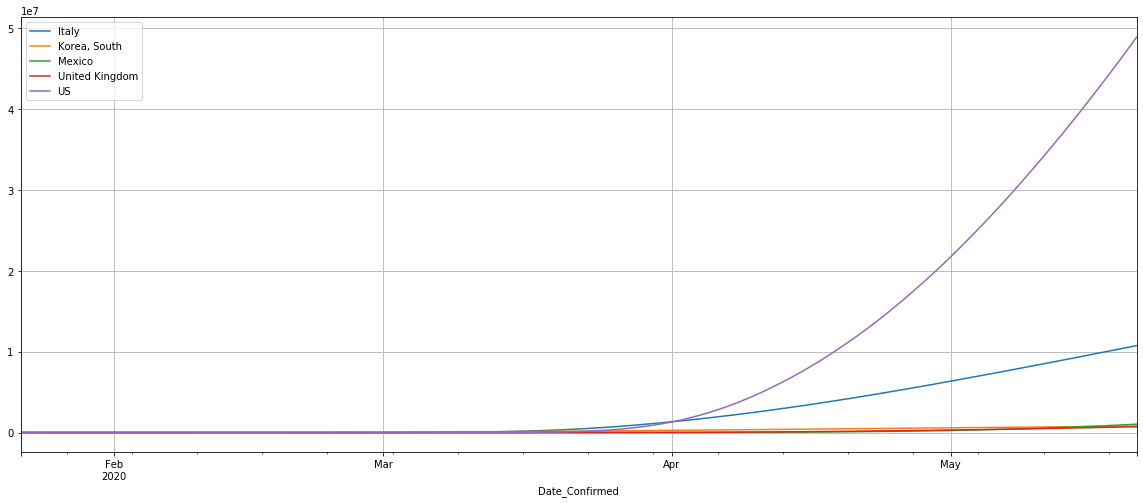

In [16]:
plt.figure(figsize=(20,8))

for state in ['Italy','Korea, South','Mexico','United Kingdom','US']:
    csse_ts[state].fillna(0).cumsum().plot()

plt.legend()
plt.grid(True)
plt.show()

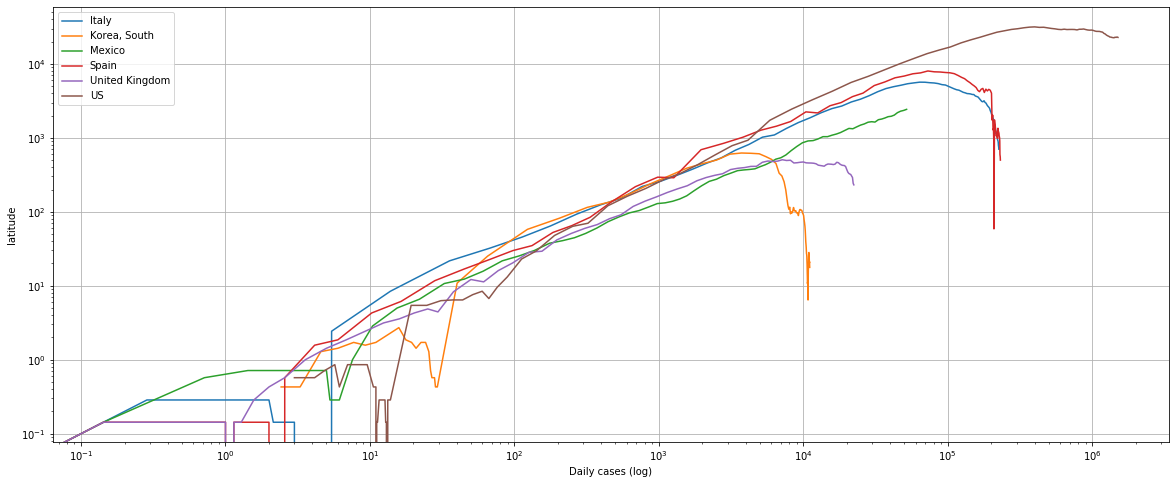

In [17]:
plt.figure(figsize=(20,8))

for state in ['Italy','Korea, South','Mexico','Spain','United Kingdom','US']:
    plt.plot(list(csse_ts[state].dropna().rolling(window=7).mean()), list(csse_daily[state].dropna().rolling(window=7).mean()), label=state)

plt.legend()
plt.grid(True)

plt.yscale('log')
plt.xscale('log')

plt.xlabel('Daily cases (log)')
plt.ylabel('latitude')

plt.show()